In [1]:
import os
root = os.path.join('..', '..')

In [2]:
import sys
sys.path.append(root)

In [3]:

import math
from typing import Any, Dict, List, Literal, Tuple

import torch
from torch import Tensor

from utils.fig import Figure

In [4]:
Figure.set_tex()
Figure.set_high_dpi()

In [5]:
def show(
    in_dim: int,
    hidden_dim: int,
    n_sample: int,
    n_noise_sample: int,
    perturbation_constraints: List[float],
    seed: int,
) -> None:
    
    resolution = int(math.sqrt(in_dim))
    mode = 'uniform'

    f = Figure(5, 9, (5, 3.3))
    imgs = []
    labels = []

    col = 9

    def _append(img_types: Tuple[Tensor, ...], label_types: Tuple[Tensor, ...]) -> None:
        for r in range(len(img_types)):
            for c in range(col):
                img = img_types[r][c].view(resolution, resolution)
                img = (img + 1) / 2
                imgs.append(img)
                label = label_types[r][c].item()
                labels.append(f'${label}$')

    def _load(norm: Literal['L0', 'L2', 'Linf'], perturbation_constraint: float) -> Dict[str, Any]:
        fname = f'{in_dim}_{hidden_dim}_{n_sample}_{n_noise_sample}' + \
                f'_{norm}_{mode}_{perturbation_constraint}_{seed}'
        path = os.path.join(root, 'artificial', fname)
        return torch.load(path, map_location='cpu')

    # Standard and Noise
    d = _load('L0', perturbation_constraints[0])
    img_types = (d['data'], d['noise_data'])
    label_types = (d['labels'], d['target_labels'])
    _append(img_types, label_types)

    # Adv
    for norm, perturbation_constraint in zip(('L0', 'L2', 'Linf'), perturbation_constraints):
        d = _load(norm, perturbation_constraint)
        img_types = (d['adv_data'],)
        label_types = (d['target_labels'],)
        _append(img_types, label_types)

    fontsize = 8

    f.axes[0][0].set_ylabel('Standard', fontsize)
    f.axes[1][0].set_ylabel('Noise', fontsize)
    f.axes[2][0].set_ylabel('Adv. $L_0$', fontsize)
    f.axes[3][0].set_ylabel('Adv. $L_2$', fontsize)
    f.axes[4][0].set_ylabel(r'Adv. $L_\infty$', fontsize)

    for ax, img, label in zip(f.generate(), imgs, labels):
        ax.imshow(img, True)
        ax.set_xlabel(label, fontsize, labelpad=1)

    f.set_axes_space(0.01, 0.01)

    f.save(root, 'figs', 'artificial_imgs.pdf')
    f.show()
    f.close()

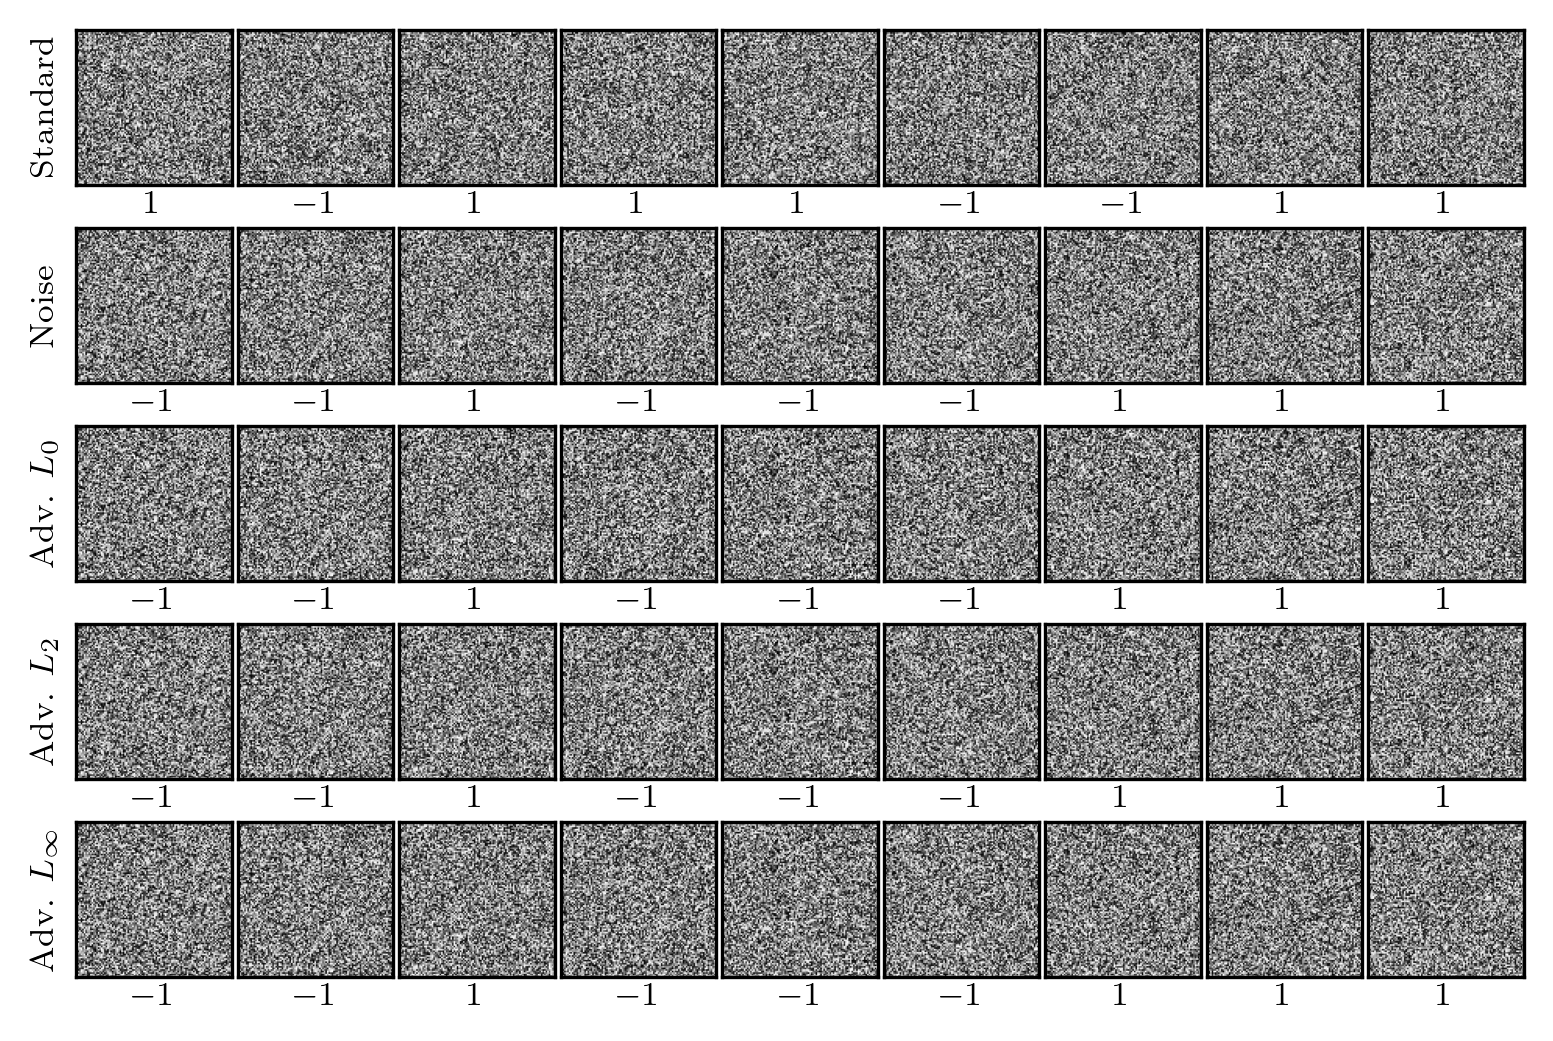

In [6]:
show(
    in_dim=10000,
    hidden_dim=1000,
    n_sample=1000,
    n_noise_sample=10000,
    perturbation_constraints=[0.05, 0.78, 0.03],
    seed=5,
)